In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

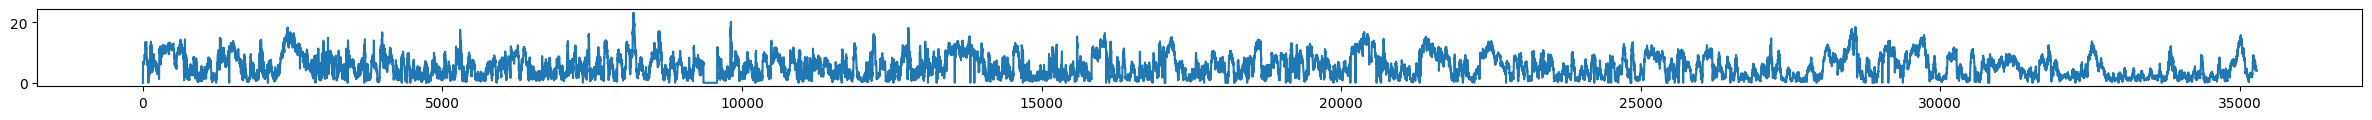

In [2]:
#一号风机的风速
df = pd.read_csv('turb1.csv')
wspd = df['Wspd'].fillna(0).to_numpy().reshape(-1)
plt.figure(figsize=(30,1))
plt.plot(wspd)
plt.show()

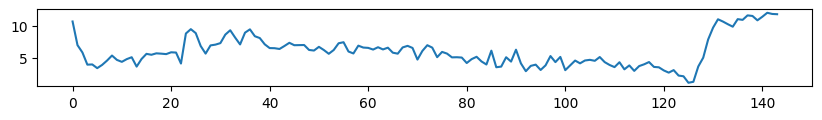

(144,)
(144,)
[  0   4 140   1 143   3 141 142   2   5 139   6 138  12 132   7 137 133
  11 131  13 125  19  22 122 111  33 129  15 121  23  14 130  16 128  18
 126  10 134  49]


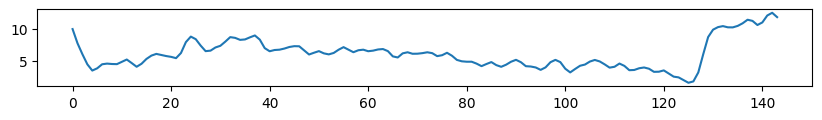

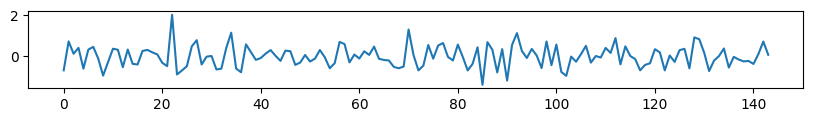

In [36]:
plt.figure(figsize=(10,1))
plt.plot(wspd[144:288])
plt.show()
wspd_fft = np.fft.fft(wspd[144:288])
freq = np.fft.fftfreq(144)
print(freq.shape)
print(wspd_fft.shape)
#plt.plot(freq,np.abs(wspd_fft))
index = np.argsort(np.abs(wspd_fft))[::-1]
selected_freq = index[:40]
print(selected_freq)
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.fft.ifft(freq_domain)
plt.figure(figsize=(10,1))
plt.plot(trans)

redisual = trans - wspd[144:288]
plt.figure(figsize=(10,1))
plt.plot(redisual)
plt.show()

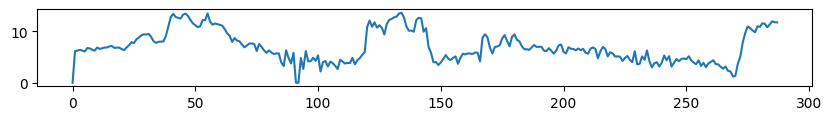

(288,)
(288,)
[  0   4 284 286   2   1 287   6 282   3 285   8 280   5 283   7 281  10
 278  11 277  15 273  26 262 275  13 263  25  17]


/home/oem/miniconda3/envs/TSF/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


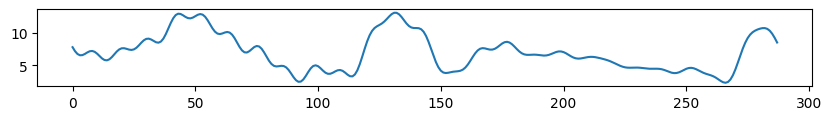

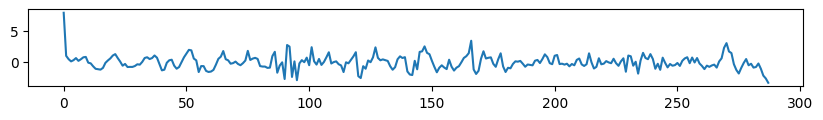

0.824999142515789


In [63]:
plt.figure(figsize=(10,1))
plt.plot(wspd[0:288])
plt.show()
wspd_fft = np.fft.fft(wspd[0:288])
freq = np.fft.fftfreq(288)
print(freq.shape)
print(wspd_fft.shape)
#plt.plot(freq,np.abs(wspd_fft))
index = np.argsort(np.abs(wspd_fft))[::-1]
selected_freq = index[:30]
print(selected_freq)
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.fft.ifft(freq_domain)
plt.figure(figsize=(10,1))
plt.plot(trans)

redisual = trans - wspd[0:288]
plt.figure(figsize=(10,1))
plt.plot(redisual)
plt.show()

print(np.abs(redisual).mean())

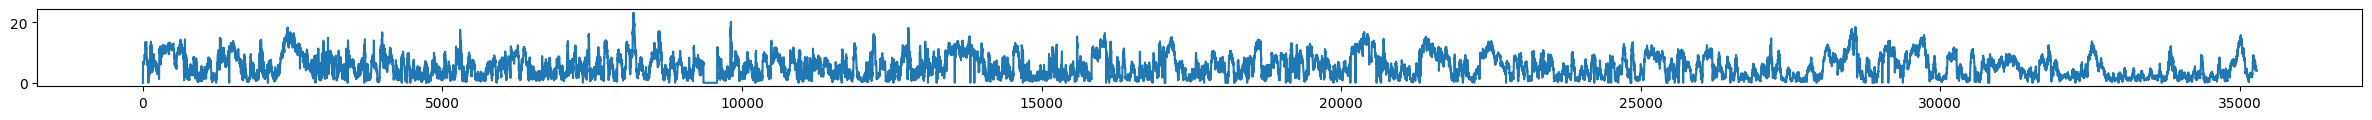

(35280,)
(35280,)


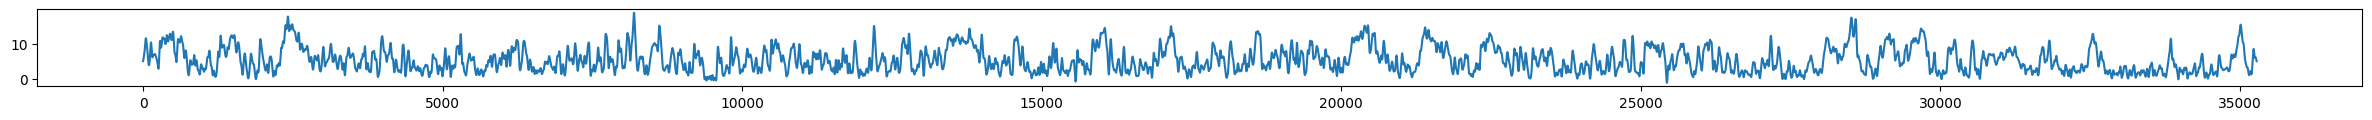

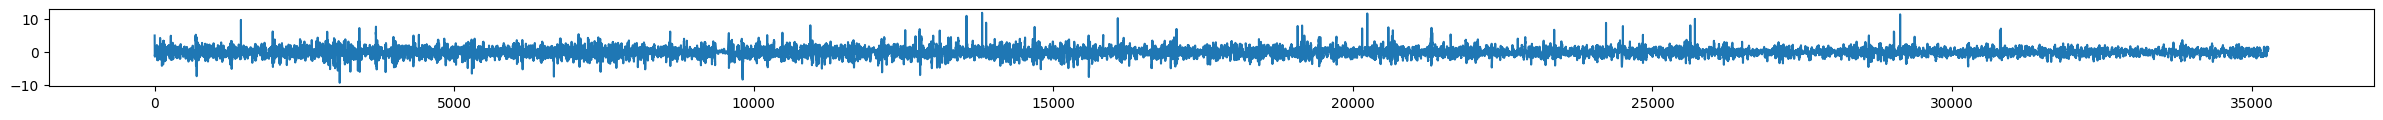

0.9119349329974655
3098
35280


In [62]:
plt.figure(figsize=(30,1))
plt.plot(wspd)
plt.show()
wspd_fft = np.fft.fft(wspd)
freq = np.fft.fftfreq(len(wspd))
print(freq.shape)
print(wspd_fft.shape)
#plt.plot(freq,np.abs(wspd_fft))
index = np.argsort(np.abs(wspd_fft))[::-1]
selected_freq = index[:1000]
freq_domain = np.zeros_like(wspd_fft)
freq_domain[selected_freq] = wspd_fft[selected_freq]

trans = np.real(np.fft.ifft(freq_domain))
plt.figure(figsize=(30,1))
plt.plot(trans)

redisual = trans - wspd
plt.figure(figsize=(30,1))
plt.plot(redisual)
plt.show()
print(np.abs(redisual).mean())
print(np.sum(np.abs(redisual) > 2))
print(len(wspd))